-------------
# The dataset
The first step is to get the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from src.data import data

In [2]:
data_root = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/dataset/raw_standardized_with_solar_mass"
data_root = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/dataset/raw_standardized"
data_names = [
    "J20_1MS.csv",
    "J20_02MS.csv",
    "J20_05MS.csv"
]

The dataset containing protoplanetary disk properties and resulting formed planets from this disk properties


There is 3 differents samples of the dataset. Being system with single star of 1, 0.2, and 0.05 solar masses.

--------------
## Dataset processing
We remove the failed formed planets being, having default value of -1000.

We also sort the dataset by the disk and the planets properties


In [13]:
data_name_index = 0
data_path = os.path.join(data_root, data_names[data_name_index])
#data_path = data_root

In [14]:
df = data.get_dataframe_single_file(data_path)
df_disk, df_planet = data.get_disk_planets_dataframe(df)

0        0.009174
1        0.017274
2        0.024667
3        0.016780
4        0.007195
           ...   
14494    0.010804
14495    0.010508
14496    0.034233
14497    0.042959
14498    0.007359
Name: metallicity, Length: 14499, dtype: float64
0       -2.036956
1       -1.762345
2       -1.607711
3       -1.774937
4       -2.142339
           ...   
14494   -1.966025
14495   -1.978085
14496   -1.465428
14497   -1.366845
14498   -2.132618
Name: metallicity, Length: 14499, dtype: float64


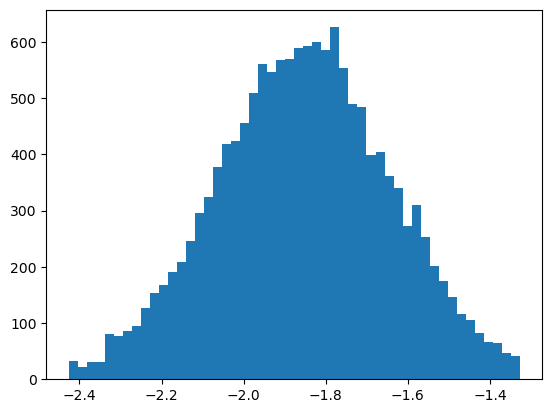

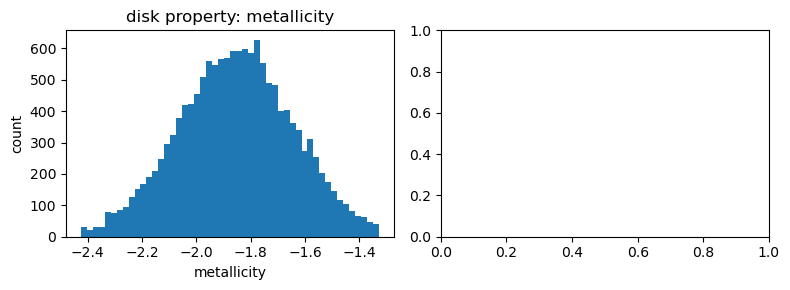

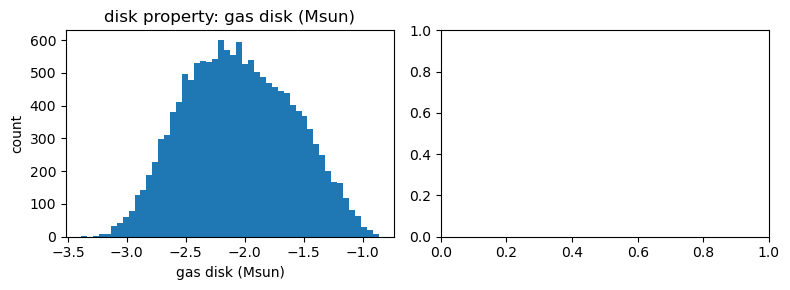

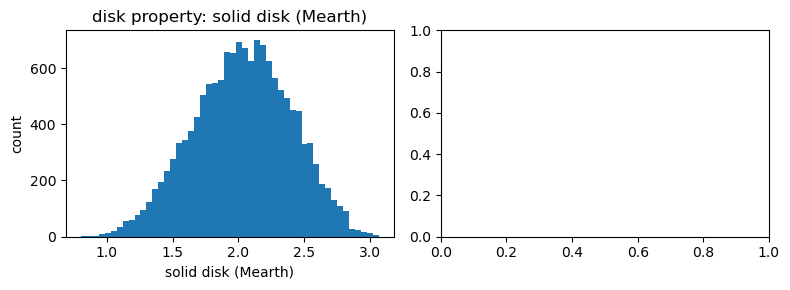

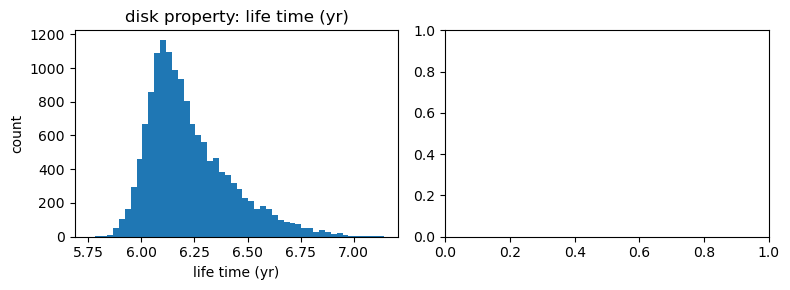

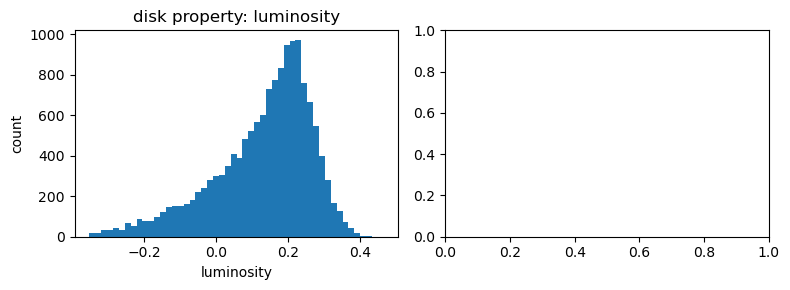

In [15]:
from src.data.dataset import DiskPlanet
disk = df_disk
print(disk["metallicity"])
dataset = DiskPlanet(df_disk, df_planet)
dataset.process()
disk = dataset.disk_data
print(disk["metallicity"])


plt.hist(disk["metallicity"], bins=50)
plt.show()

data.plot_disk_features_histogram(dataset.disk_data, log=False)

### Planet

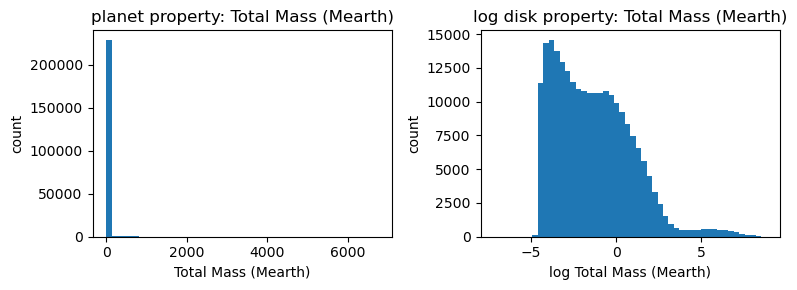

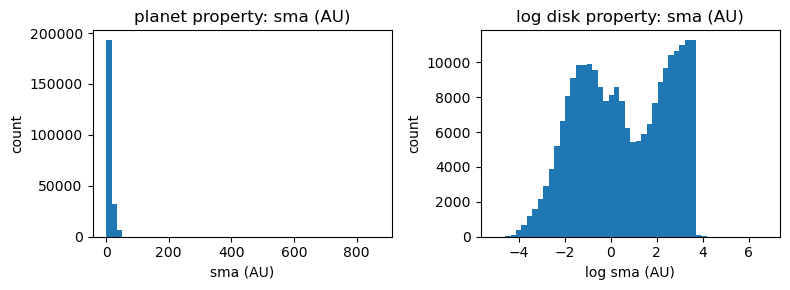

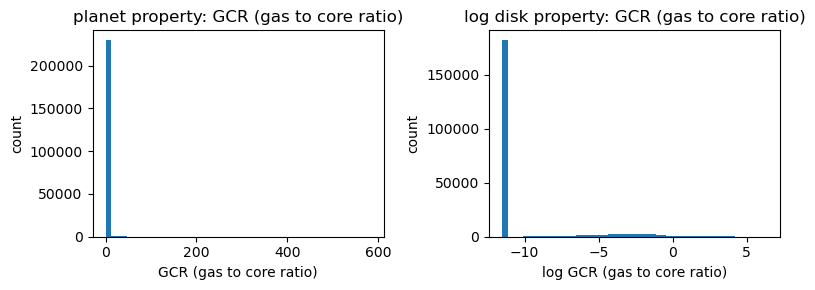

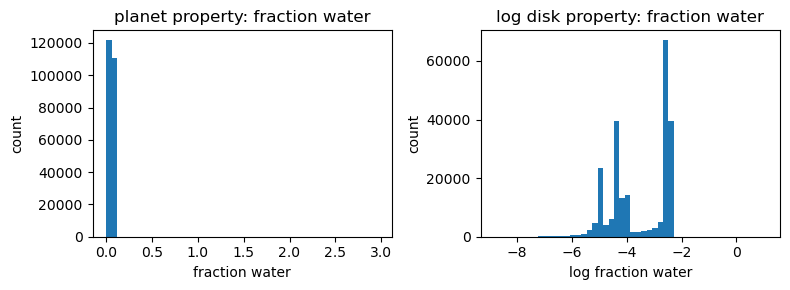

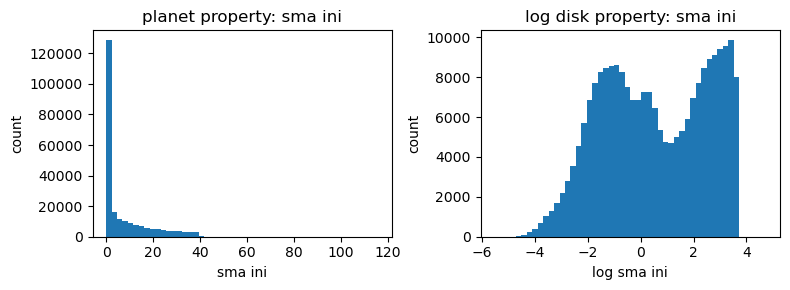

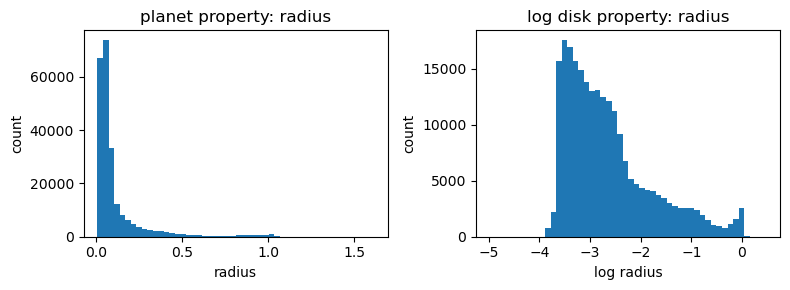

In [16]:
data.plot_planets_features_histogram(df_planet)

# feature = df_disk["metallicity"]
# fig, ax = plt.subplots(1,1, figsize=(4,4))
# log_features = np.log10(1e-5+feature)

# print(log_features)

# ax.hist(log_features, bins=50)
# plt.show()

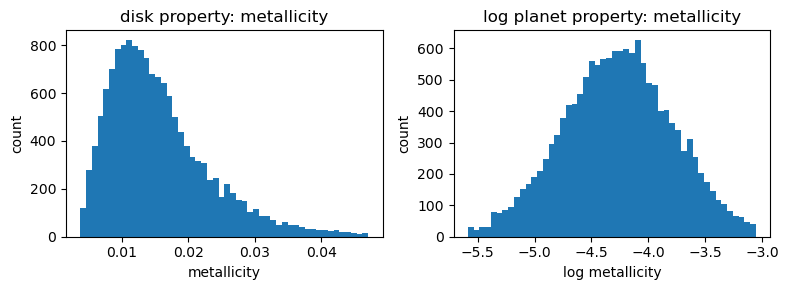

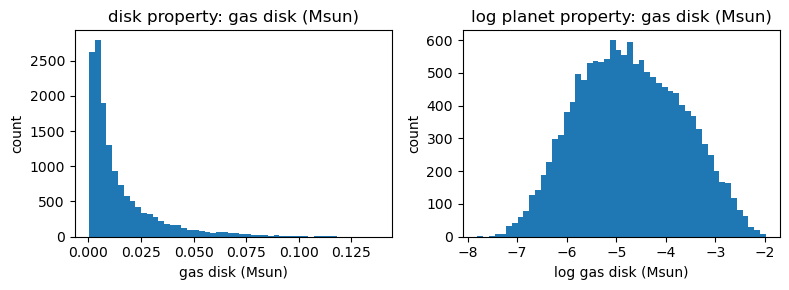

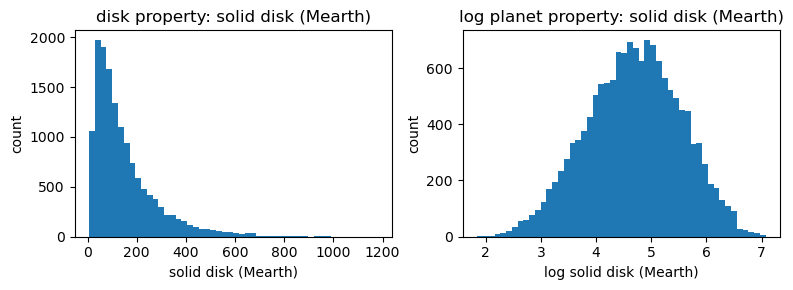

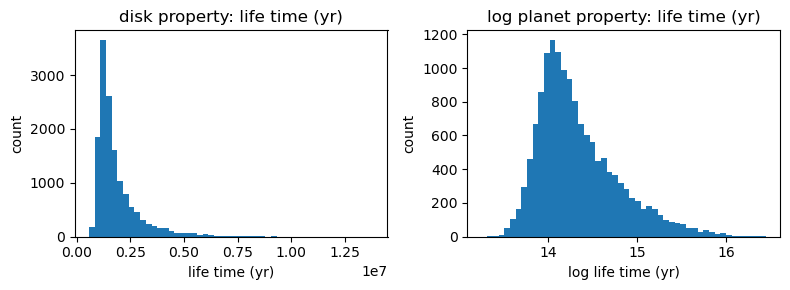

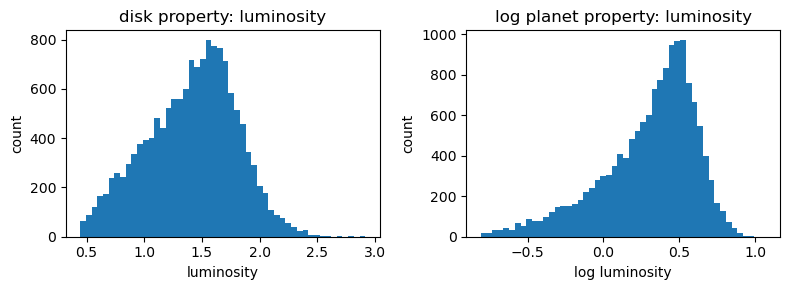

In [17]:
data.plot_disk_features_histogram(df_disk)

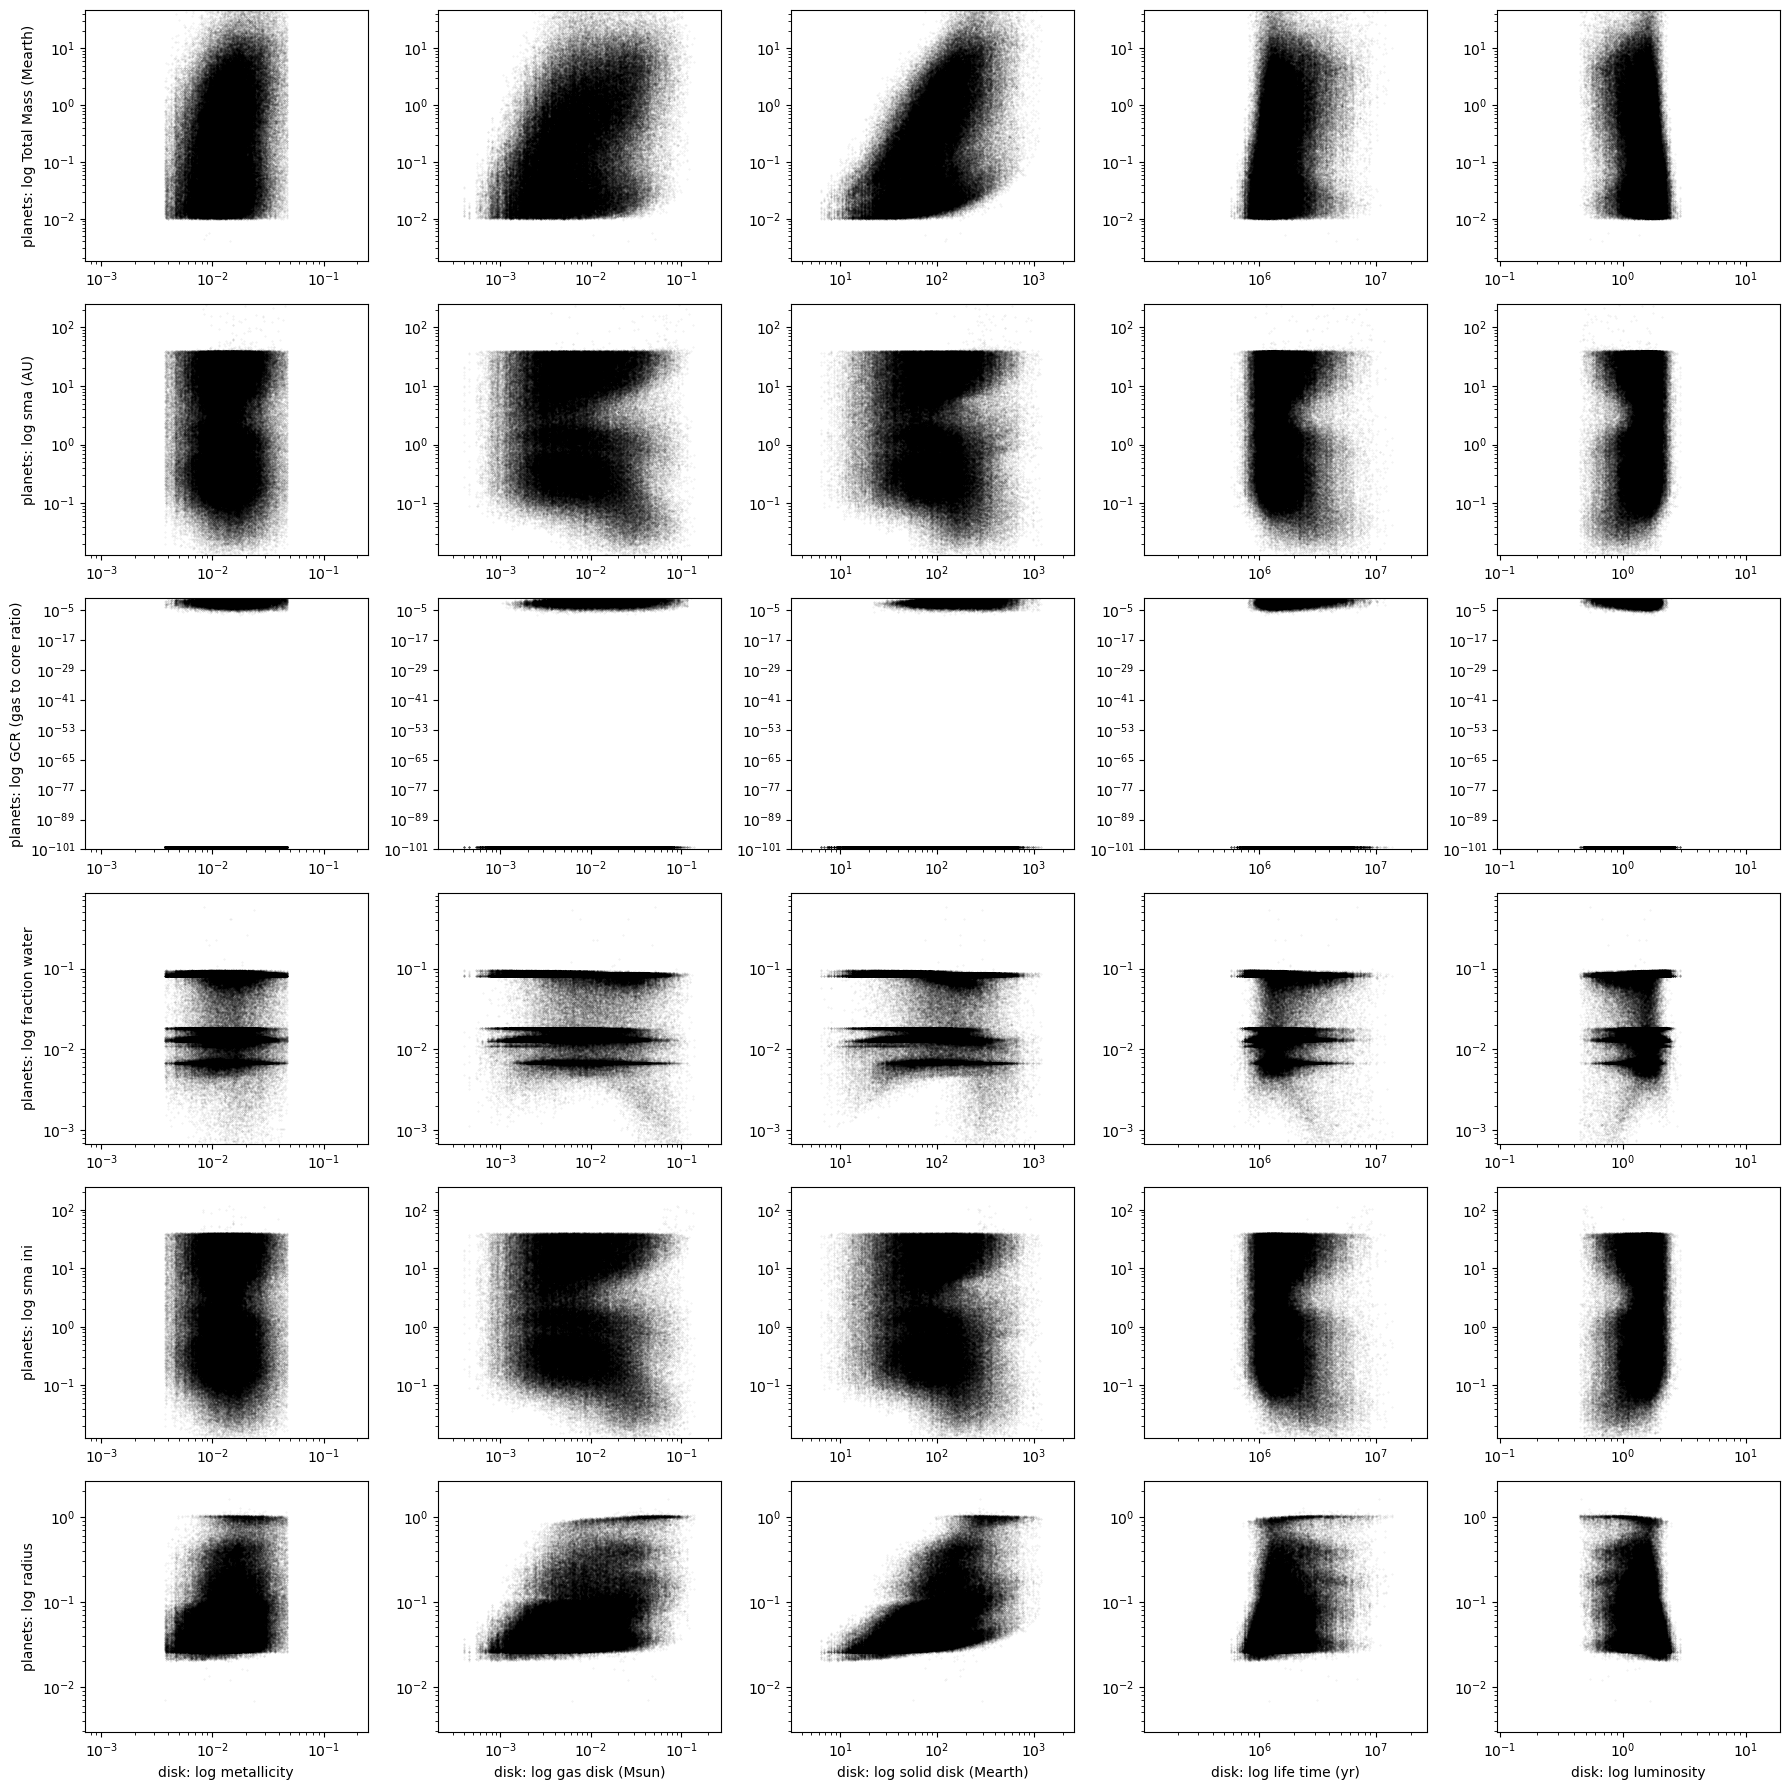

In [18]:
#plt.style.use("/home/yannh/Documents/uni/phd/mypackage/mypackage/pyplot/presentation.mlpstyle")
data.corner_plot_all_features(df, log=True)


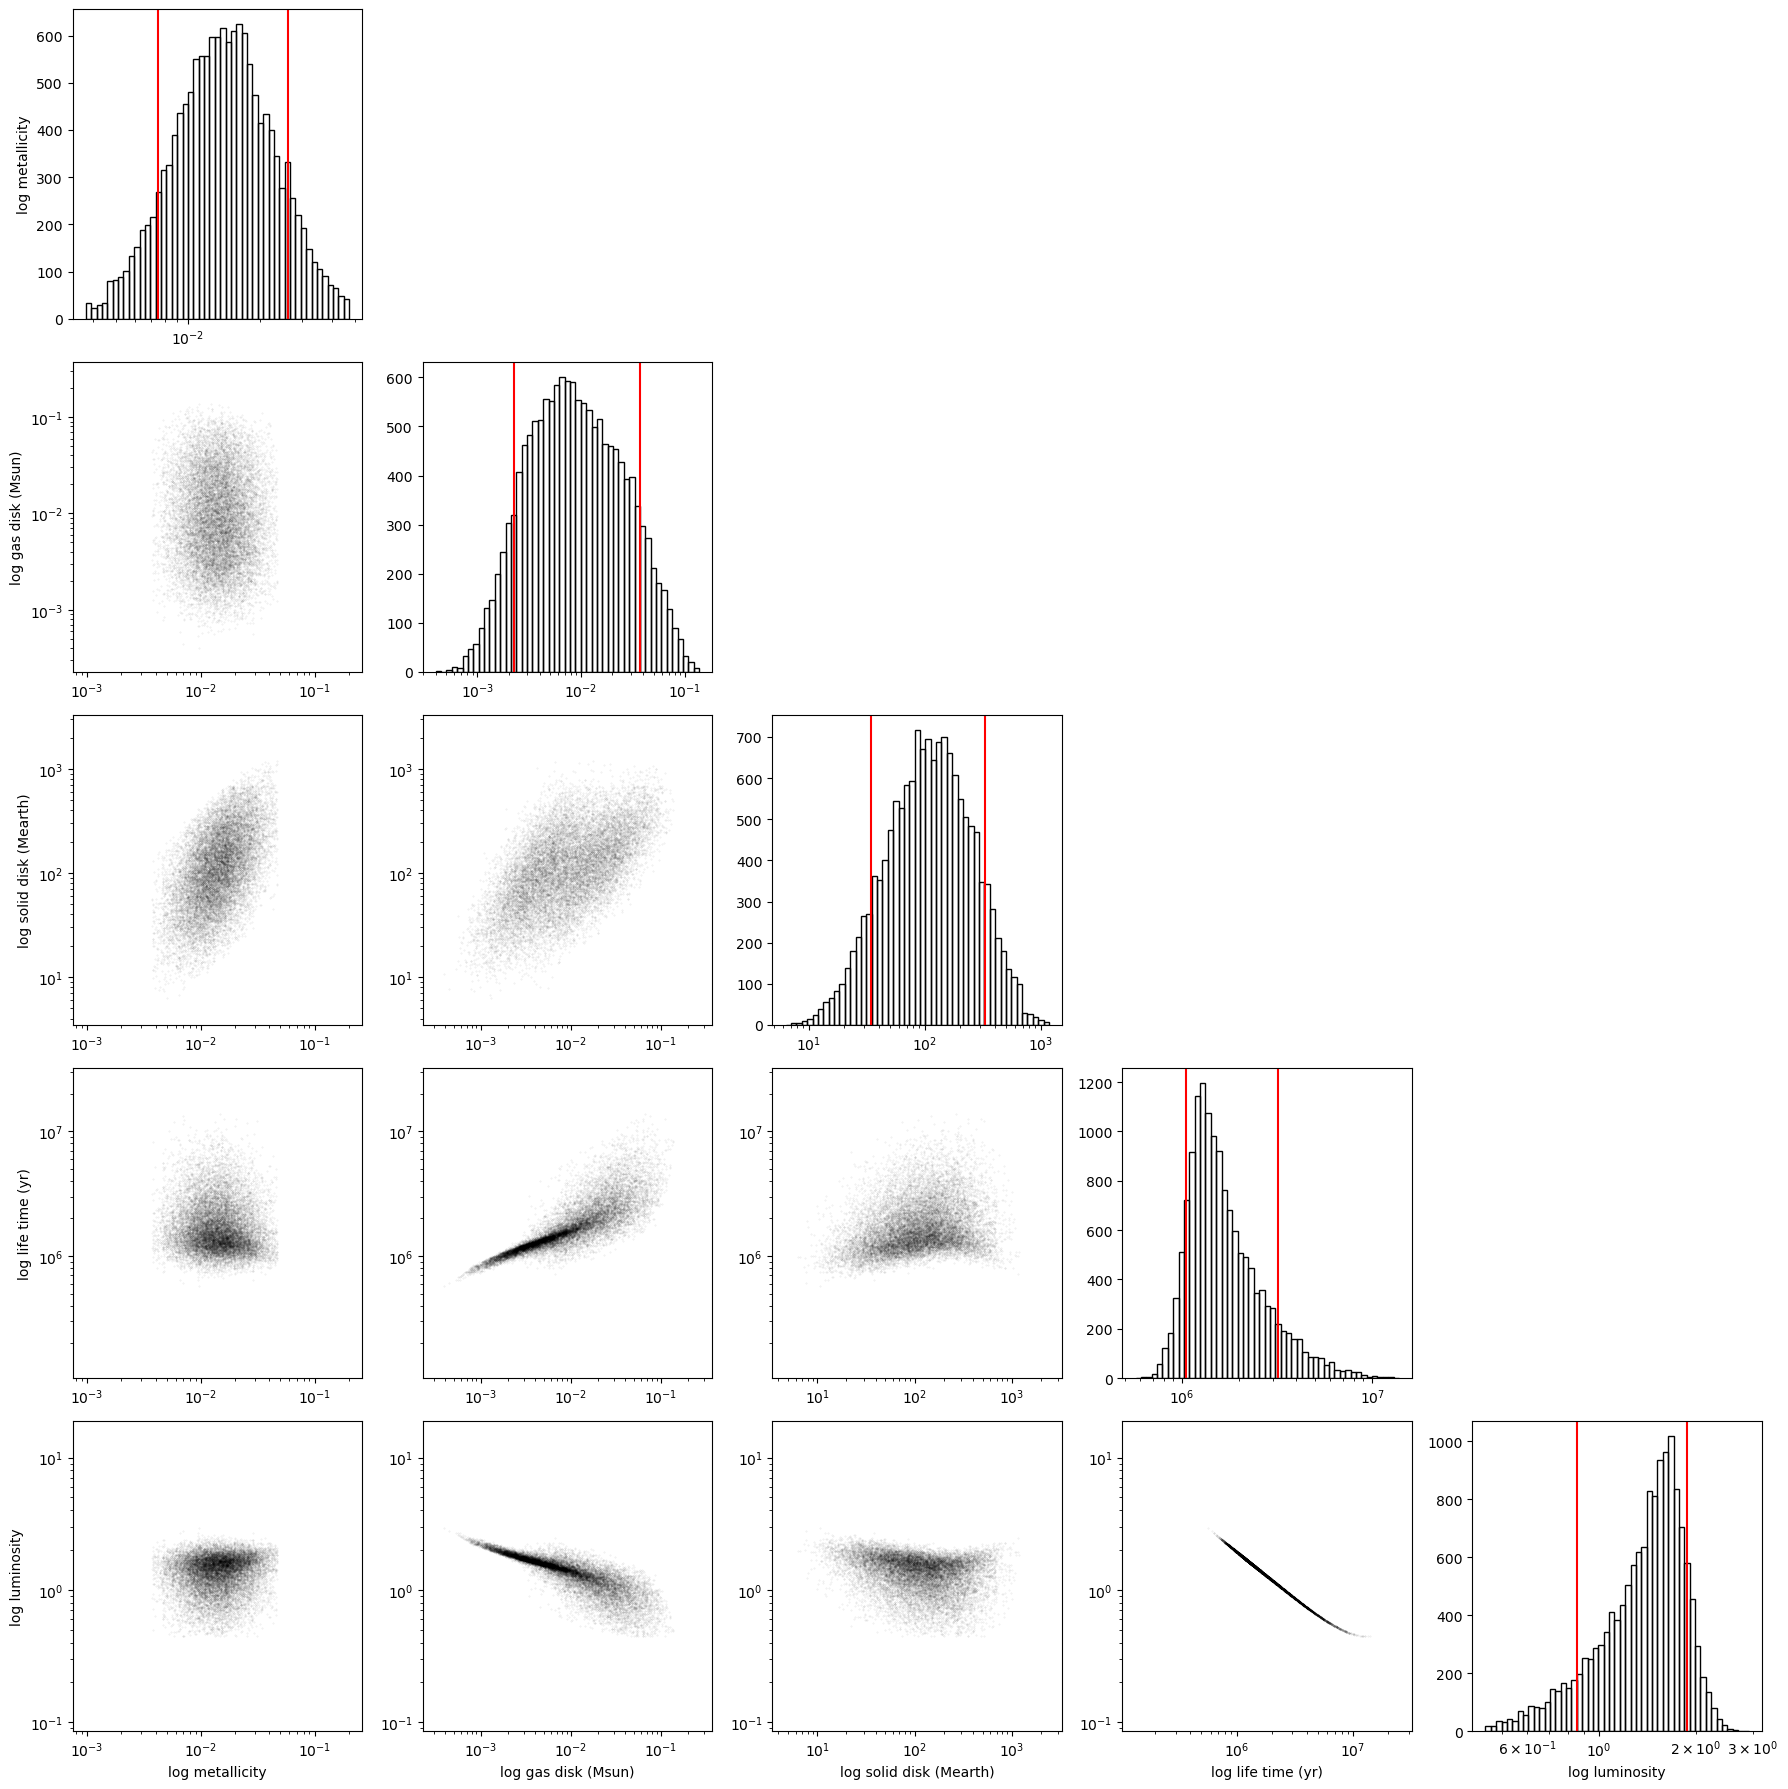

In [19]:
data.corner_plot_disk_features(df_disk, log=True)

In [20]:
print(df_planet["GCR (gas to core ratio)"].quantile(0.1))
print(df_planet["GCR (gas to core ratio)"].quantile(0.9))

0.0
0.0660161045581591


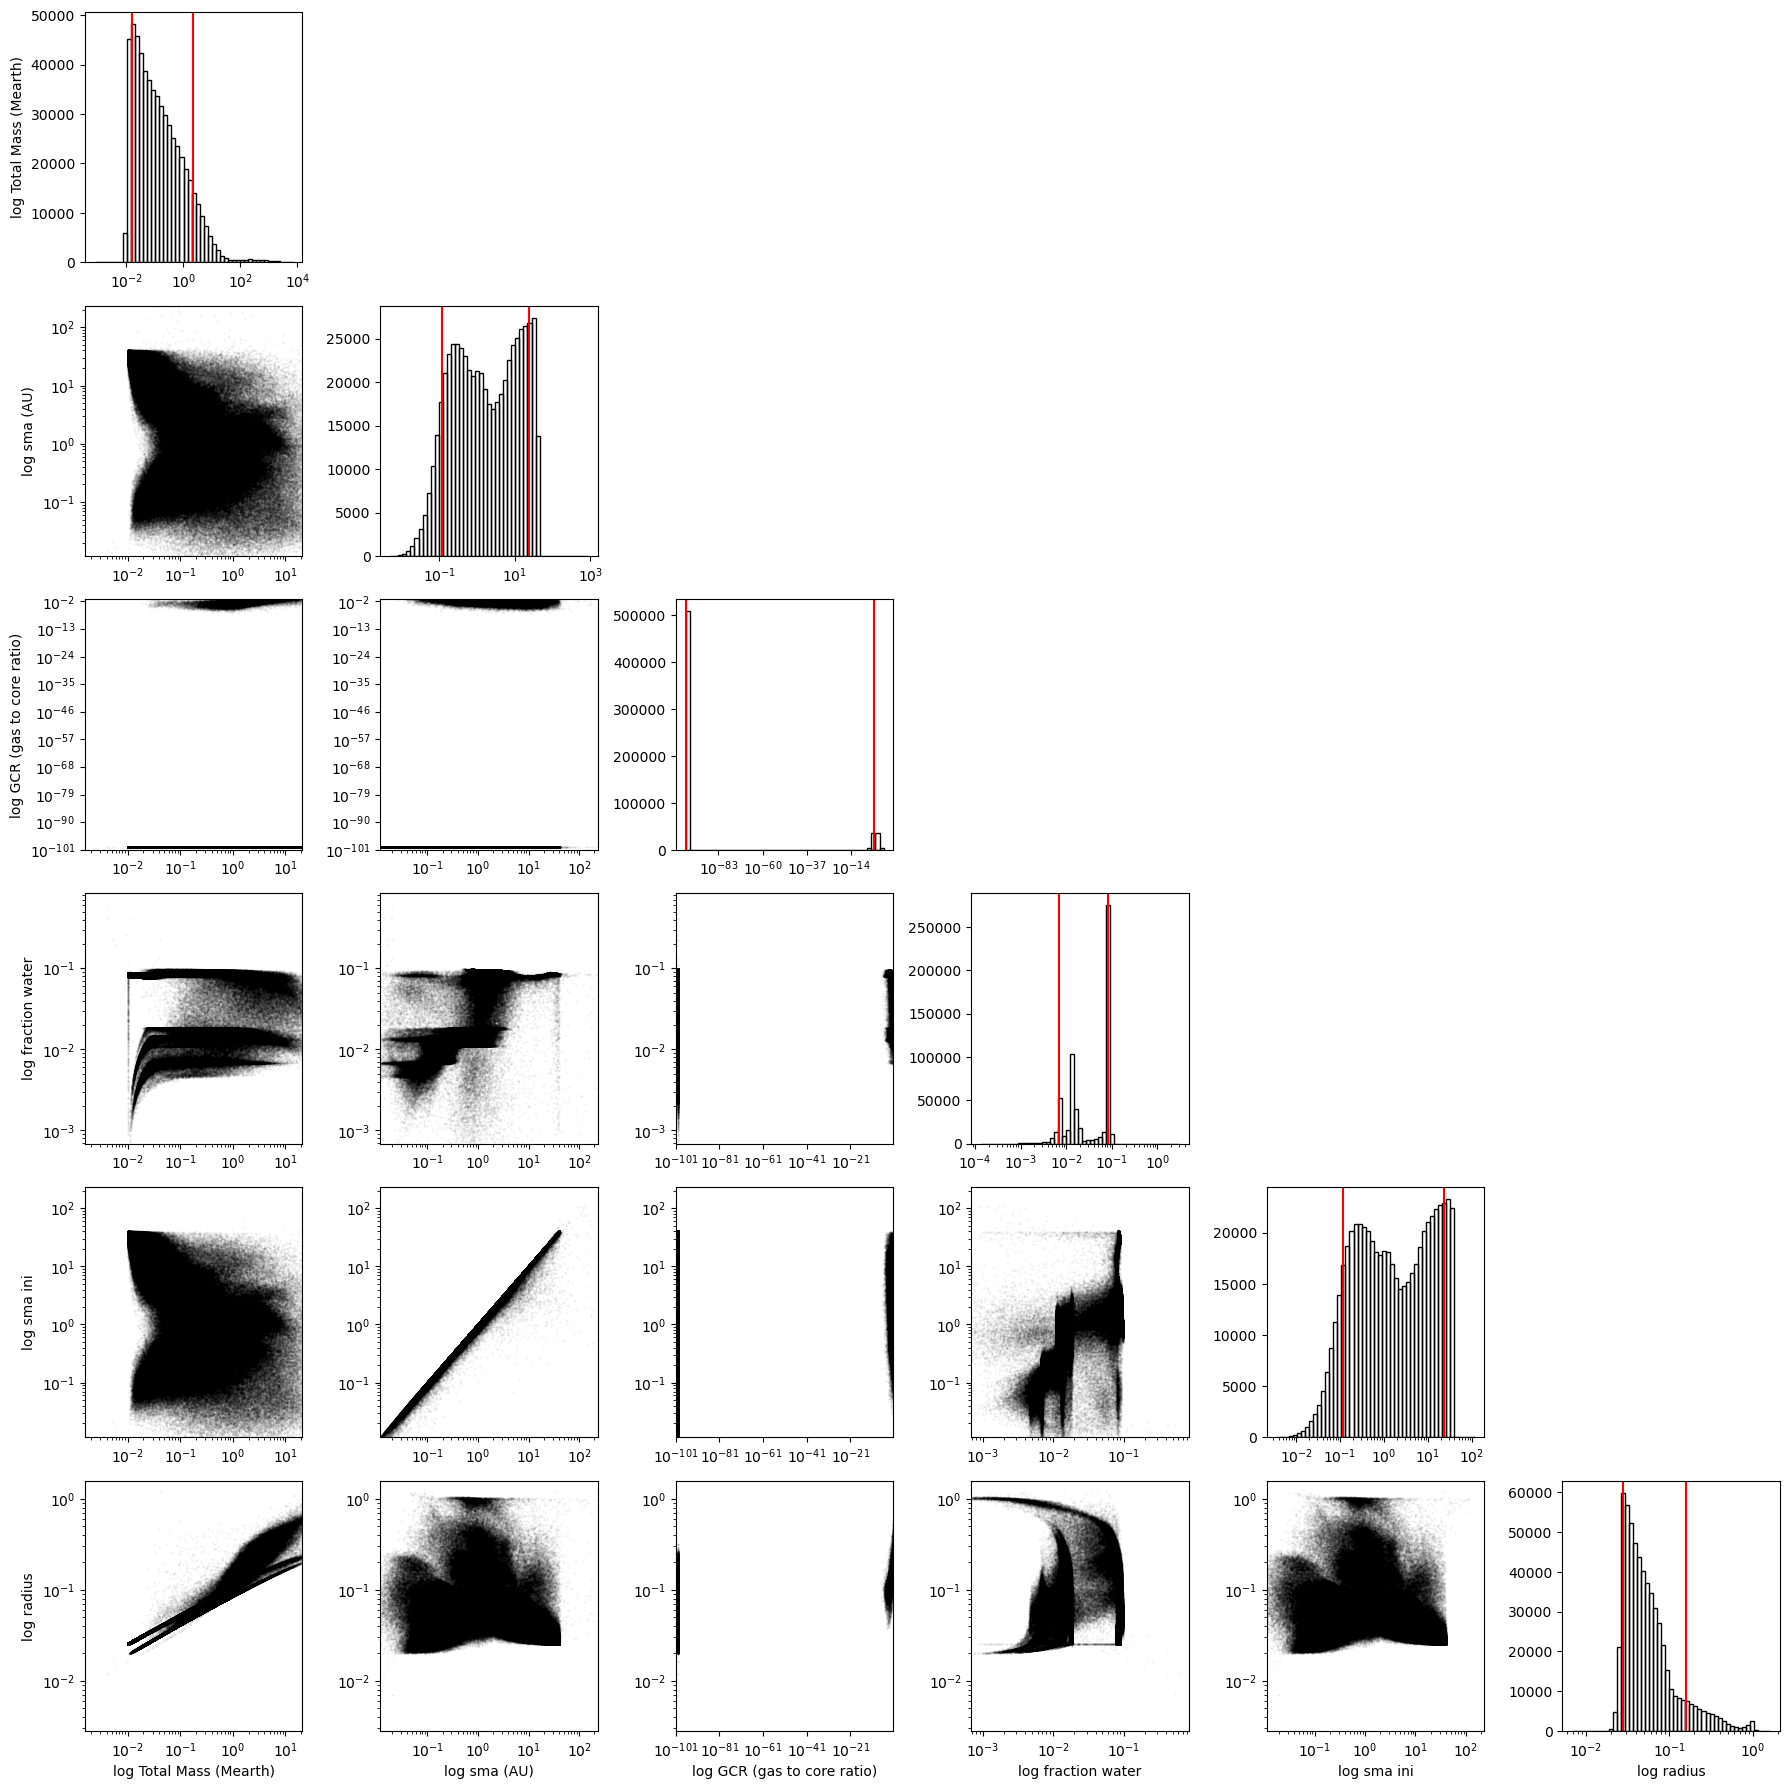

In [11]:
data.corner_plot_planets_features(df_planet, log=True)


## Creation of the first simple labels
A first draft of labels will be created:
- the total number of planets in each system
- the number of failed formed planets ?
- the total mass of the planets 

In [12]:
dataframe_planets_propriety.head()

NameError: name 'dataframe_planets_propriety' is not defined

In [ ]:
planet_counts = dataframe_planets_propriety['System number'].value_counts().sort_index()
print(planet_counts)

In [ ]:
total_mass_sum = dataframe_planets_propriety.groupby('System number')['Total Mass (Mearth)'].sum()
print(total_mass_sum)

In [ ]:
data = pd.DataFrame(dataframe_disk_propriety)
data = data.join(planet_counts, on='System number')
data = data.join(total_mass_sum, on='System number')
print(dataframe_disk_propriety.shape, planet_counts.shape, total_mass_sum.shape, data.shape)

In [ ]:
data.head()

In [ ]:
# Shuffle the dataframe
data = data.drop(labels="System number", axis=1)
data.head()

In [ ]:
# we can look for correlation in the data and the label already

fig, ax = plt.subplots(len(disk_columns), 2, figsize=(15, 12))

for i_dc, dc in enumerate(disk_columns):
    
    ax[i_dc, 0].set(
        ylabel=dc
    )
    ax[i_dc, 0].scatter(data["count"], data[dc], s=1)
    ax[i_dc, 1].scatter(data["Total Mass (Mearth)"], data[dc], s=1)

ax[-1, 0].set(
    xlabel="count"
)
ax[-1, 1].set(
    xlabel="Total Mass (Mearth)"
)

plt.show()
    

In [ ]:
dataframe_gooddata.tail(10)

In [ ]:
for i in np.random.choice(pd.unique(dataframe_gooddata["System number"]), size=25):
    system = dataframe_gooddata[dataframe_gooddata["System number"] == i]
    fig, ax = plt.subplots(1,1, figsize=(15, 5))
    n_planets = system.shape[0]
    density = np.empty(n_planets)
    sma = np.empty(n_planets)
    density = np.empty(n_planets)
    radius = np.empty(n_planets)
    mass = np.empty(n_planets)
    
    for l in range(system.shape[0]):
        #print(system.iloc[[l]])
        sma[l] = system.iloc[[l]]["sma (AU)"]
        radius[l] = system.iloc[[l]]["radius"]
        mass[l] = system.iloc[[l]]["Total Mass (Mearth)"]
    density = 4/3 * np.pi * radius**3 /mass
    cbar_target = ax.scatter(sma, np.zeros_like(sma), s=100*radius, c=density, cmap="viridis_r")
    fig.colorbar(cbar_target, label = "density")
    ax.set_xscale("log")
    plt.show()



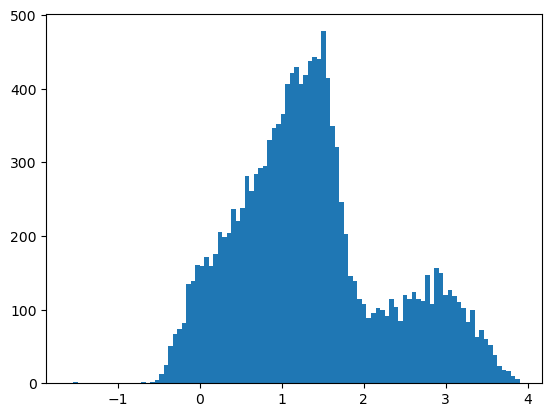

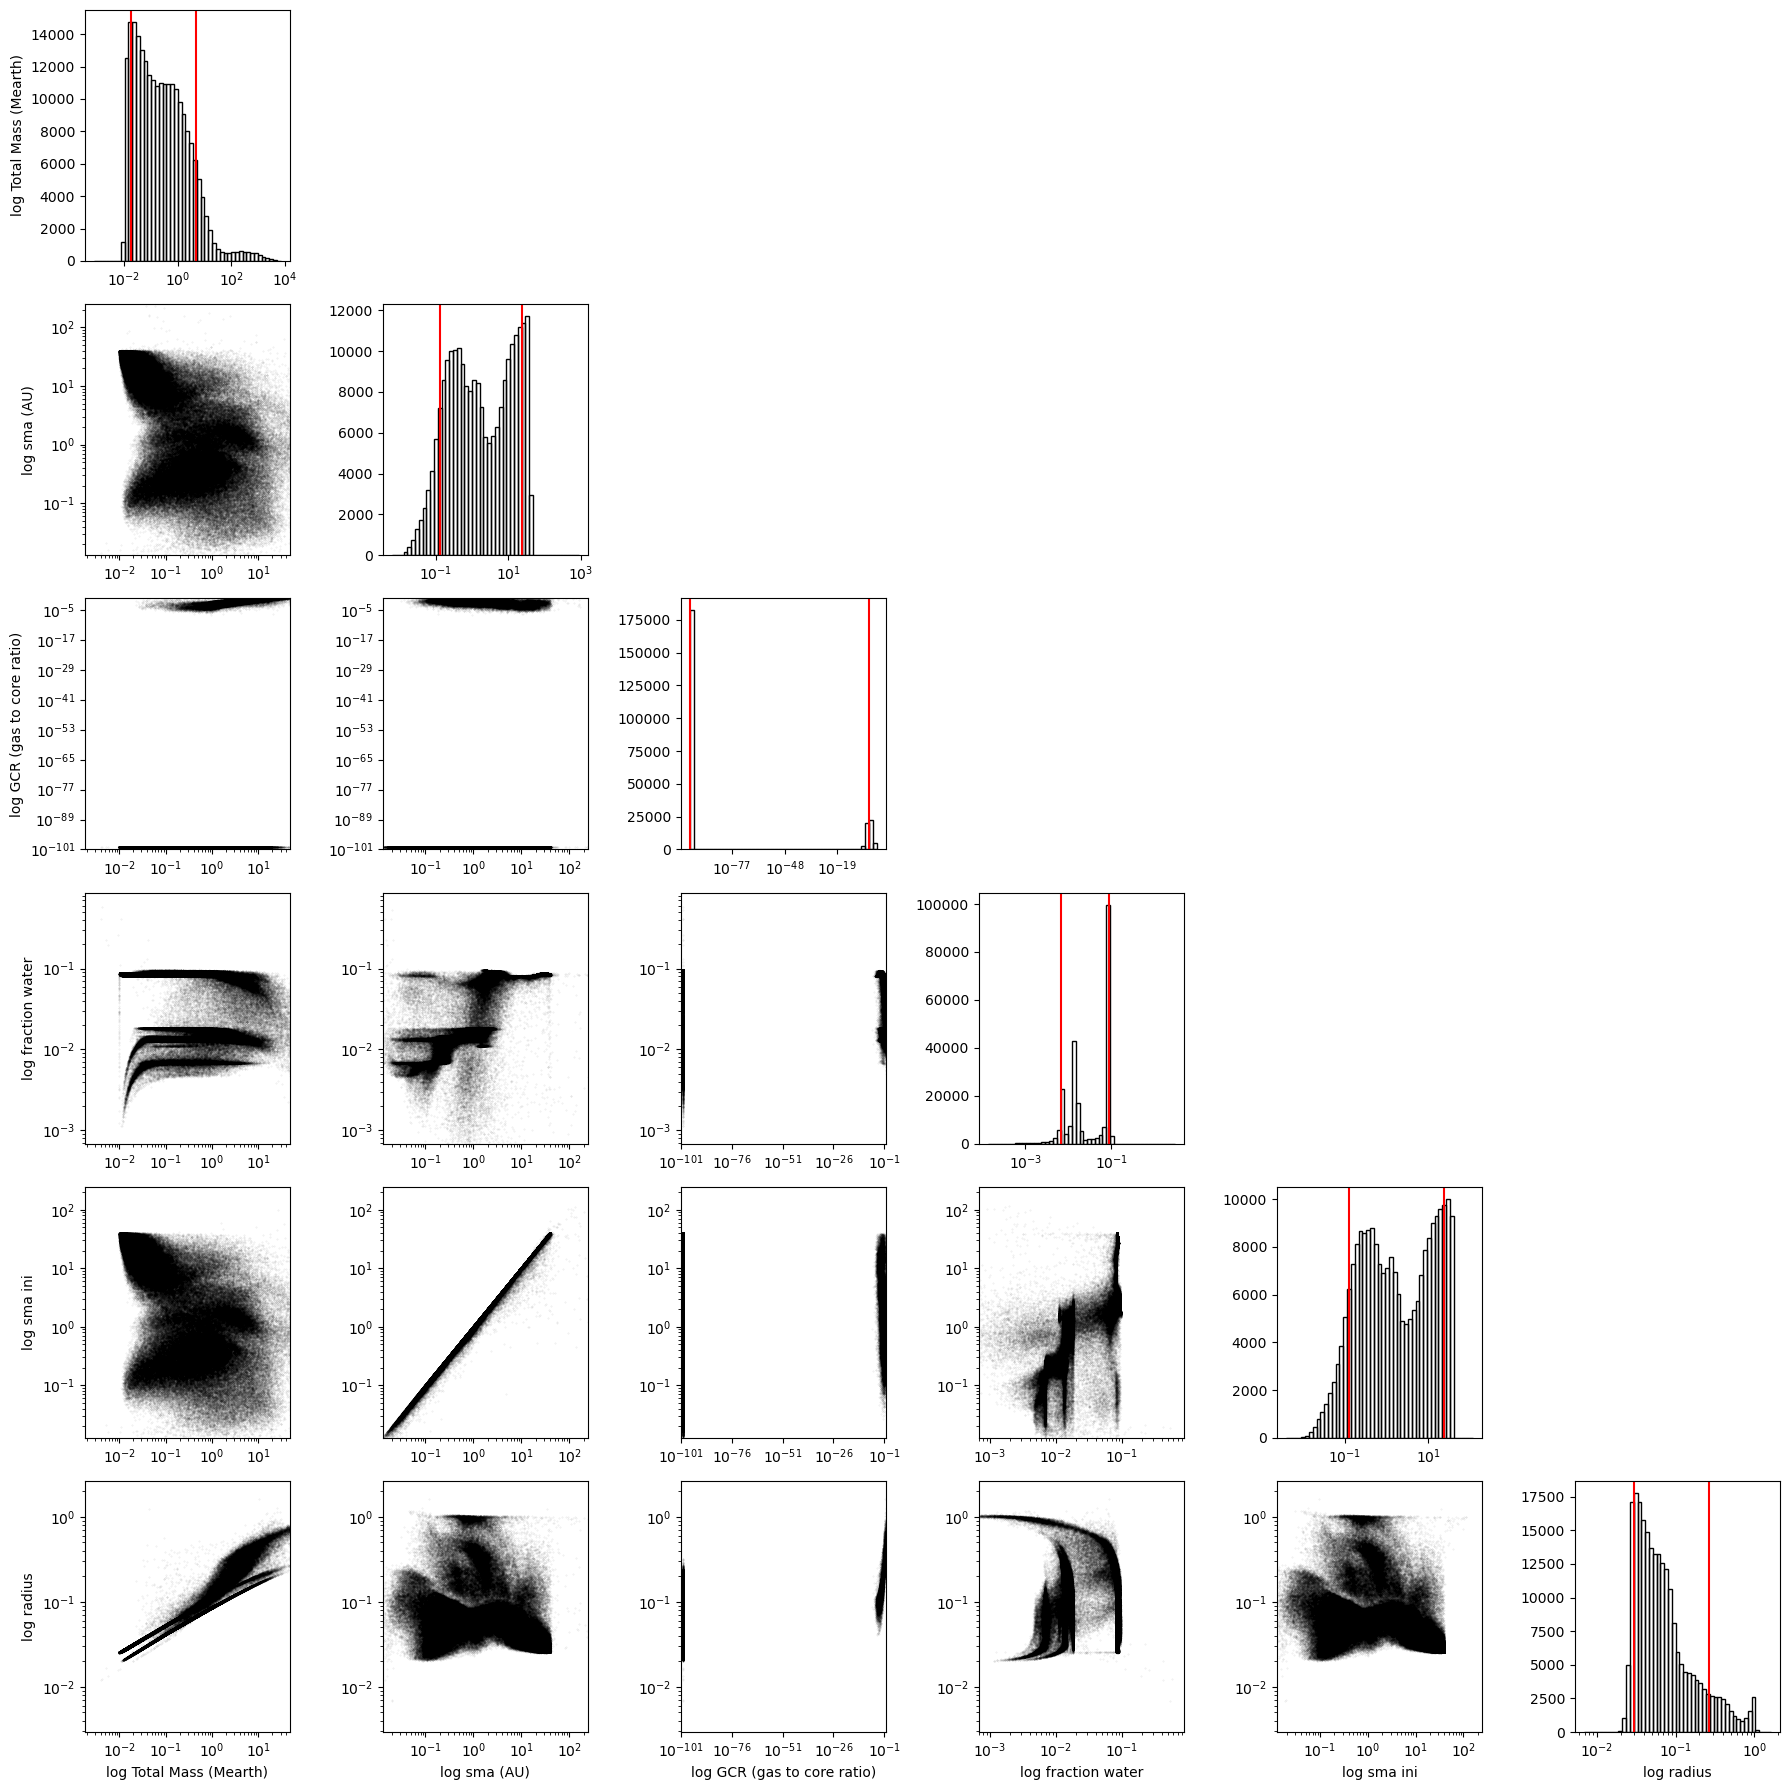

In [9]:
path = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/dataset/raw_standardized/J20_1MS.csv"
 
from src.data import data
from matplotlib import pyplot as plt
import numpy as np

df = data.get_dataframe_single_file(path)
df_planet = data.get_planets_dataframe(df)
df_planet_mass = data.get_total_planets_mass(df_planet)

plt.hist(np.log10(1e-5+df_planet_mass), bins=100)
plt.show()

data.corner_plot_planets_features(df_planet, log=True)